для вывода графиков в рабочем пространстве сразу же нужно использовать меджик %matplotlib inline:

In [1]:
from matplotlib import pylab as plt
%matplotlib inline

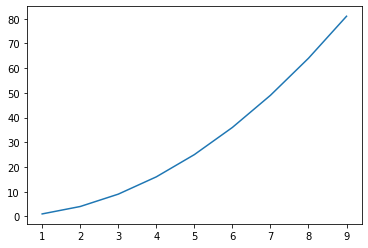

In [2]:
x = [i for i in range(1,10)]
y = [i**2 for i in range(1,10)]
plt.plot(x,y)

посмотреть список всех магических команд:

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

 - для работы с переменными окружения: %env TEST=5
 - для запуска скрипта .py: %run ./test.py

In [6]:
%%time # выводит информацию о времении работы кода в рамках одной ячейки - за какое время выполнится ячека

import time
for i in range(50):
    time.sleep(0.1)

UsageError: Can't use statement directly after '%%time'!


In [7]:
%timeit x = [(i**10) for i in range(10)] # выводит информацию среднего значения трех лучших прогонов в выборке из 10к

2.66 µs ± 44.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## numpy

In [73]:
import numpy as np
vector = np.array([[1,2],[3,4],[5,6], [7,8]]) # создаем немножко матрицы

In [74]:
print(vector)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [10]:
vector.dtype # какие значения внутри матрицы, если даже один элемент будет другим (float) - все будет другим

dtype('int32')

In [11]:
type(vector) # тип элемента - многомерный массив

numpy.ndarray

In [12]:
vector.shape # размер массива

(4, 2)

In [13]:
vector.ndim # число осей массива

2

In [14]:
np.sum(vector) # суммирует все элементы массива

36

In [15]:
np.sum(vector, axis = 0) # суммирует по столбкам

array([16, 20])

In [16]:
np.sum(vector, axis=1) # суммирует по строкам

array([ 3,  7, 11, 15])

In [17]:
vector.transpose() # транспонирование массива

array([[1, 3, 5, 7],
       [2, 4, 6, 8]])

In [18]:
vector.T # синтаксический сахар по транспонированию

array([[1, 3, 5, 7],
       [2, 4, 6, 8]])

In [19]:
vector # при оперцаиях тнаспонирования сама переменная не изменяется

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [20]:
vector.reshape(2,3) # изменение формы массива

ValueError: cannot reshape array of size 8 into shape (2,3)

In [ ]:
vector.reshape(3, -1)

In [21]:
vector.reshape(2, -1)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [22]:
vector[:, 1] # выдаем только второй столбец

array([2, 4, 6, 8])

In [23]:
vector[0, :] # выдаем только первую строку

array([1, 2])

In [24]:
vector[::2, :] # выдает первую и еще какую надо

array([[1, 2],
       [5, 6]])

In [25]:
vector[::1,]

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [26]:
is_even = vector % 2 == 0 # превращение массива в булев массив

In [27]:
print(is_even)

[[False  True]
 [False  True]
 [False  True]
 [False  True]]


In [28]:
np.sum(is_even) # суммирует только True в массиве

4

In [29]:
is_even[0, 0] = True

In [30]:
np.sum(is_even) # проверка на то, как работает np.sum  с элементами массива

5

In [31]:
vector[vector % 2 == 0] # вытащим только четные элементы из массива

array([2, 4, 6, 8])

In [32]:
zero_array = np.zeros((3,3))
print(zero_array) # создание массива, состоящего из нулей

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [33]:
one_array = np.ones((3,3))
print(one_array) # создание массива, состоящего из едниц

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [34]:
unit_matrix = np.identity(5)
print(unit_matrix) # создание единичной матрицы

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [35]:
# объединение нескольких массивов
stacked_array = np.stack((vector, np.zeros(vector.shape),
                         np.ones(vector.shape)))
stacked_array

array([[[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]])

## арифметические операции

In [36]:
vector+1 # прибавление к каждому элементу массива единицы

array([[2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [37]:
vector*2 # умножение каждого эемента массива

array([[ 2,  4],
       [ 6,  8],
       [10, 12],
       [14, 16]])

In [38]:
vector**2 # возведение в квадрат каждого элемента массива

array([[ 1,  4],
       [ 9, 16],
       [25, 36],
       [49, 64]], dtype=int32)

In [39]:
vector*vector

array([[ 1,  4],
       [ 9, 16],
       [25, 36],
       [49, 64]])

In [40]:
vector+vector

array([[ 2,  4],
       [ 6,  8],
       [10, 12],
       [14, 16]])

In [41]:
np.sin(vector) # синус от каждого элемента

array([[ 0.84147098,  0.90929743],
       [ 0.14112001, -0.7568025 ],
       [-0.95892427, -0.2794155 ],
       [ 0.6569866 ,  0.98935825]])

## матричное умножение

In [42]:
#для того, чтобы удалить строку в массиве
# для удаления столбца указывает единичный аксис
vector = np.delete(vector,(3), axis = 0)

In [64]:
# мне не сильно нравится, так как нельзя выбрать аксис
# но, добавление к массиву
vector = np.vstack([vector, (2,2) ]) 

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 8 and the array at index 1 has size 2

In [45]:
vector = np.c_[vector,[1,1,1,1]] # обавление столбца ну вот вообще огонь как удобно

In [53]:
vector = np.c_[vector,[1,1,1,1]]

In [60]:
vector = np.c_[vector,[1,1,1,1]]

In [63]:
vector = np.r_[vector,[1]]

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [84]:
vector = np.array([[1,2],[3,4],[5,6]])

In [87]:
vector = np.c_[vector, [1,1,1]]

In [91]:
vector.dot(vector**2) # матричное умножение

array([[ 44,  72,   4],
       [ 64, 112,   8],
       [ 84, 152,  12]])

In [93]:
vector.dot((vector**2).T) # транспонирование

array([[ 10,  42,  98],
       [ 20,  92, 220],
       [ 30, 142, 342]])

In [95]:
vector @ (vector ** 2).T # ругой вариант записи

array([[ 10,  42,  98],
       [ 20,  92, 220],
       [ 30, 142, 342]])

небольшой пояснение того, что происходит с матрицами при умножении их одна на другую "точечное произведение вух массивов"
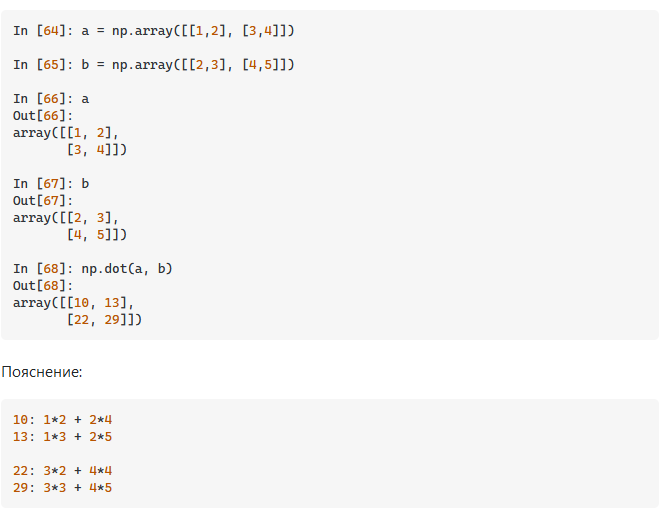

In [99]:
vector # нетранспонированная матрица

array([[1, 2, 1],
       [3, 4, 1],
       [5, 6, 1]])

In [100]:
vector.T # транспонированная матрица

array([[1, 3, 5],
       [2, 4, 6],
       [1, 1, 1]])

пример для транспонирования матриц:
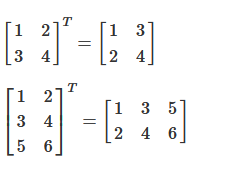

__в анализе данных транспонирование применяется для того, чтобы в таблицах сделать столбцы строками, а строки столбцами__
- это преследует : сделать более удобным визуальный анализт таблиц
- для подготовки данных в том случае, если таблица повернута неудобоваримым форматом

In [101]:
np.random.rand(2,3) # генерация случайных чисел

array([[0.4799076 , 0.9994569 , 0.06676922],
       [0.88025046, 0.63149187, 0.21096478]])

In [102]:
np.random.seed(2019)

In [103]:
np.random.rand(2,3)

array([[0.90348221, 0.39308051, 0.62396996],
       [0.6378774 , 0.88049907, 0.29917202]])

In [111]:
np.random.normal(2,1, size=5) # нормальное распределение???

array([2.41092825, 2.48668927, 1.46447029, 1.16109206, 1.18762518])